These results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [2]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/policyBaselineRes/results/alloy'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['system.generator.numPackets',
         'system.generator.avgReadLatency',
         'system.generator.avgWriteLatency',
         'system.generator.readBW',
         'system.generator.writeBW'
          ]




hit_miss = ['Hit', 'MissClean', 'MissDirty']
rd_perc = ['RO', 'R67', 'WO']
des = ['2', 'Alloy']

rows = []

for d in des:
    for rdPr in rd_perc:
        for hm in hit_miss:
            stats = [d, rdPr, hm]
            for stat in Stats:
                time_file_path = '{}/{}_{}_{}/stats.txt'.format(datadir, d, rdPr, hm)
                ret_line = getStat(time_file_path,stat)

                if ret_line != 0:
                    #if ret_line=='nan' :
                    #    stat_val = 0
                    #else:
                    stat_val = ret_line.split()[1]
                else:
                    stat_val = -1
                stats.append(stat_val)

            rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'des',
         'rdPr',
         'hm',
         'numPackets',
         'avgReadLatency',
         'avgWriteLatency',
         'readBW',
         'writeBW'
         ])

df['totBW'] = (df['readBW'].astype(float) + df['writeBW'].astype(float))/1000000000
df['ARL'] = (df['avgReadLatency'].astype(float))/1000
df['AWL'] = (df['avgWriteLatency'].astype(float))/1000
df['ART'] = (df['ARL'].astype(float)*0.67 + df['AWL'].astype(float)*0.33)



df.to_csv("/scr/babaie/policyBaselineRes/3rd/dramCacheController/myPlots/res_Sep_26/res_1.csv")

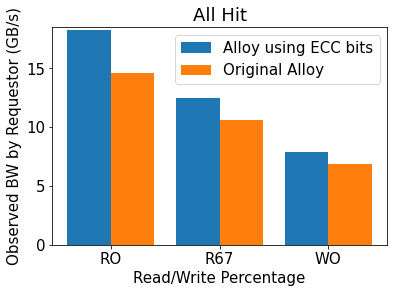

In [6]:
x = ['RO', 'R67', 'WO']
df_temp = df.query('(des==["2"]) and (hm==["Hit"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(des==["Alloy"]) and (hm==["Hit"])')[['totBW']]
y3 = df_temp['totBW']

x_axis = np.arange(len(x))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)
#plt.rcParams.update({'font.size':10})

plt.bar(x_axis -0.2, y2, width=0.4, label = 'Alloy using ECC bits')
plt.bar(x_axis +0.2, y3, width=0.4, label = 'Original Alloy')

# Xticks

plt.xticks(x_axis, x)
plt.ylim([0, 18.5])

# Display

plt.title("All Hit")
plt.xlabel("Read/Write Percentage")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()

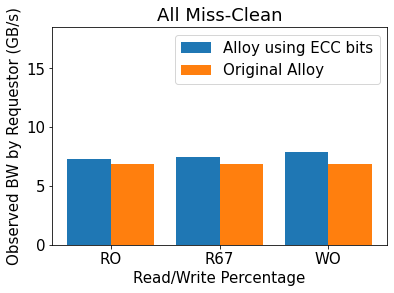

In [7]:
x = ['RO', 'R67', 'WO']
df_temp = df.query('(des==["2"]) and (hm==["MissClean"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(des==["Alloy"]) and (hm==["MissClean"])')[['totBW']]
y3 = df_temp['totBW']

x_axis = np.arange(len(x))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.bar(x_axis -0.2, y2, width=0.4, label = 'Alloy using ECC bits')
plt.bar(x_axis +0.2, y3, width=0.4, label = 'Original Alloy')

# Xticks
plt.ylim([0, 18.5])

plt.xticks(x_axis, x)

# Display

plt.title("All Miss-Clean")
plt.xlabel("Read/Write Percentage")
plt.ylabel("Observed BW by Requestor (GB/s)")
# plt.legend(bbox_to_anchor=(0.3, 1.2), loc='upper right', borderaxespad=0)
plt.legend()
plt.show()

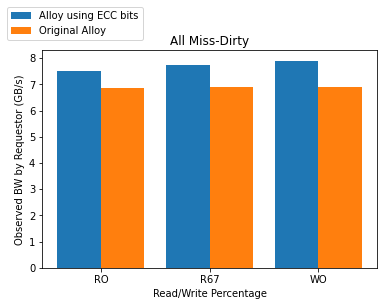

In [69]:
x = ['RO', 'R67', 'WO']
df_temp = df.query('(des==["2"]) and (hm==["MissDirty"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(des==["Alloy"]) and (hm==["MissDirty"])')[['totBW']]
y3 = df_temp['totBW']

x_axis = np.arange(len(x))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.bar(x_axis -0.2, y2, width=0.4, label = 'Alloy using ECC bits')
plt.bar(x_axis +0.2, y3, width=0.4, label = 'Original Alloy')

# Xticks

plt.xticks(x_axis, x)

# Display

plt.title("All Miss-Dirty")
plt.xlabel("Read/Write Percentage")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend(bbox_to_anchor=(0.3, 1.2), loc='upper right', borderaxespad=0)
plt.show()